# Single Hidden Layer Neural Network

### This is three layer neural network that includes:-
  *Input layer  - 2 units
  
  *Hidden layer - 3 units
  
  *Output layer - 2 units

The code is implemented on OR gate written in python using numpy and matplotlib.pyplot library



In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,1]])

In [18]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a
def sigmoid_back(a) :
    da = np.dot(a,(1-a).T)
    return da


In [19]:
print("Input is ",X)
print("output is ",Y)

Input is  [[0 0 1 1]
 [0 1 0 1]]
output is  [[0 1 1 1]]


In [20]:
def layer_size(X,h,Y):
    n_x = np.shape(X)[0]
    n_h = h
    n_y = np.shape(Y)[0]
    return n_x,n_h,n_y

def initialize(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x)
    b1 = np.zeros((n_h,1))
    w2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))
    
   
    parameters = {'w1': w1,
                  'w2': w2,
                  'b1': b1,
                  'b2': b2
                 }

    return parameters

In [21]:
n_x,n_h,n_y = layer_size(X,3,Y)

print(n_x,n_h,n_y)

parameters = initialize(n_x,n_h,n_y)

print (parameters)

2 3 1
{'w1': array([[ 1.68951398,  0.203795  ],
       [ 0.46052439, -1.14225045],
       [ 1.90375436, -0.21403889]]), 'w2': array([[ 0.81808165,  0.2790667 , -0.44547415]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'b2': array([[0.]])}


In [22]:
def activate(parameters,X):

    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']


    z1 = np.dot(w1,X)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = sigmoid(z2)
    units = {'z1' : z1,'a1' : a1,'z2' : z2,'a2' : a2}
    return units

In [23]:
units = activate(parameters,X)

print (units)

{'z1': array([[ 0.        ,  0.203795  ,  1.68951398,  1.89330899],
       [ 0.        , -1.14225045,  0.46052439, -0.68172606],
       [ 0.        , -0.21403889,  1.90375436,  1.68971547]]), 'a1': array([[0.5       , 0.55077314, 0.84416023, 0.86913236],
       [0.5       , 0.24190742, 0.61313857, 0.33587617],
       [0.5       , 0.44669363, 0.87031586, 0.84418674]]), 'z2': array([[0.3258371 , 0.31909524, 0.47399534, 0.42868972]]), 'a2': array([[0.58074614, 0.57910374, 0.61632896, 0.60556074]])}


In [24]:
def cost_function(X,Y,units):
    a2 = units['a2']
    loss = -(np.dot(Y,np.log(a2).T)+np.dot((1-Y),np.log(1-a2).T))
    m = np.shape(X)[1]
    cost  = (1/m) * loss
    return cost

In [25]:
cost = cost_function(X,Y,units)

print(cost)

[[0.60028178]]


In [26]:
def backward(units,Y,X,parameters):

    m = np.shape(X)[1]

    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    a2 = units['a2']
    a1 = units['a1']
    z1 = units['z1']
    z2 = units['z2']

    da2 =  -1 * (np.divide(Y,a2) - np.divide(1-Y,1-a2))
    dz2 =  np.dot(sigmoid_back(a2),da2)
    dw2 = (1/m) * np.dot(dz2,a1.T)
    db2 =  (1/m) * np.sum(dz2,axis = 1,keepdims=True)
    da1 = np.dot(w2.T,dz2)
    dz1 = np.dot(sigmoid_back(a1),da1)
    dw1 = (1/m) * np.dot(dz1,X.T)
    db1 =  (1/m) * np.sum(dz1,axis = 1,keepdims=True)
    
    np.reshape(dw1, (n_h, n_x))
    np.reshape(dw2, (n_y, n_h))
    np.reshape(db1, (n_h, 1))
    np.reshape(db2, (n_y, 1))
    
    grads = {'dw1':dw1,
             'dw2':dw2,
             'db1':db1,
             'db2':db2
            }

    return grads

In [27]:
grads = backward(units,Y,X,parameters)
print(grads['db1'].shape)
print(grads['db2'].shape)
print(grads)

(3, 1)
(1, 1)
{'dw1': array([[-0.54350235, -0.56081678],
       [-0.33656111, -0.34728298],
       [-0.51551144, -0.53193416]]), 'dw2': array([[-0.616847  , -0.18639945, -0.57389775]]), 'db1': array([[-0.43420275],
       [-0.26887788],
       [-0.41184088]]), 'db2': array([[-0.62938282]])}


In [28]:

def update(grads,parameters,alpha):
    dw1 = grads['dw1']
    dw2 = grads['dw2']
    db1 = grads['db1']
    db2 = grads['db2']

    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    w1 = w1 -  alpha * dw1
    w2 = w2 -  alpha * dw2
    b1 = b1 -  alpha * db1
    b2 = b2 -  alpha * db2
    

    parameters = {'w1':w1,
                 'w2':w2,
                 'b1':b1,
                 'b2':b2
                 }
    return parameters


In [29]:
def model(X,Y,h,alpha,iteration,print_cost):
    n_x,n_h,n_y = layer_size(X,h,Y)
    parameters = initialize(n_x,n_h,n_y)
    costs = []
    for i in range (0,1500):
        units = activate(parameters,X)
        grads = backward(units,Y,X,parameters)
        parameters = update(grads,parameters,0.03)
        cost = cost_function(X,Y,units)
        if(i%100 == 0):
            costs.append(cost)
    units = activate(parameters,X)
    if print_cost:
        print(costs)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()    
    return units['a2']       

[array([[0.6648577]]), array([[0.53739345]]), array([[0.5070879]]), array([[0.46191209]]), array([[0.40788817]]), array([[0.36729689]]), array([[0.34295406]]), array([[0.32869695]]), array([[0.31992182]]), array([[0.31408038]]), array([[0.30981535]]), array([[0.30642337]]), array([[0.30355561]]), array([[0.30104564]]), array([[0.29881418]])]


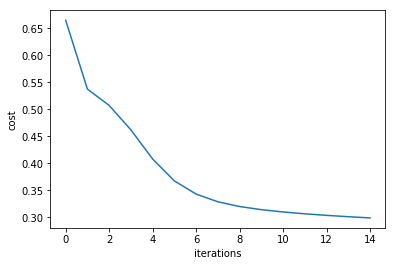

[[0.69494919 0.99999854 0.99999855 0.99999858]]


In [30]:
a2 = model(X,Y,3,0.03,2000,print_cost = True)
print (a2)